# Experiement: Round Two | 19%

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("../data/cardio_19.csv")

df.head()

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
0  72899  17769       1     167    70.0    150     90            2     1   
1  67122  15243       2     170    70.0    165     80            1     1   
2  61439  22598       1     161    90.0    120     80            1     1   
3  70752  18838       1     163    73.0    150     90            1     1   
4  24081  23435       1     151    54.0    120     80            3     3   

   smoke  alco  active  cardio  
0      0     0       1       1  
1      0     0       1       1  
2      0     0       1       1  
3      0     0       1       1  
4      0     0       1       1

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43029 entries, 0 to 43028
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           43029 non-null  int64  
 1   age          43029 non-null  int64  
 2   gender       43029 non-null  int64  
 3   height       43029 non-null  int64  
 4   weight       43029 non-null  float64
 5   ap_hi        43029 non-null  int64  
 6   ap_lo        43029 non-null  int64  
 7   cholesterol  43029 non-null  int64  
 8   gluc         43029 non-null  int64  
 9   smoke        43029 non-null  int64  
 10  alco         43029 non-null  int64  
 11  active       43029 non-null  int64  
 12  cardio       43029 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 4.3 MB


0    34679
1     8350
Name: cardio, dtype: int64

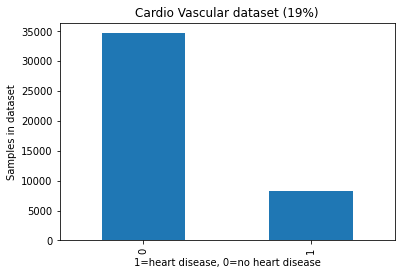

In [3]:
pd.value_counts(df['cardio']).plot.bar()
plt.title('Cardio Vascular dataset (19%)')
plt.xlabel('1=heart disease, 0=no heart disease')
plt.ylabel('Samples in dataset')
df['cardio'].value_counts()

Balance ratio: 8350/43029 = 0,1940551

# Train/Test split

The random_state is 42.

In [4]:
# Importing the splitter, classification model, and the metric
from sklearn.model_selection import train_test_split
#Splitting the data with stratification
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['cardio']), df['cardio'], test_size = 0.2, stratify = df['cardio'], random_state = 42)

In [5]:
X_train.head()

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
29430  61151  19034       1     151    71.0    140     90            1     1   
26146  51705  21383       1     170    78.0    120     80            1     1   
22136  40160  19763       1     161    73.0     80     60            2     1   
11898  11189  14606       1     162    59.0    120     80            1     1   
28202  57654  15810       2     170    74.0    130    100            1     1   

       smoke  alco  active  
29430      0     0       0  
26146      0     0       1  
22136      0     0       0  
11898      0     0       1  
28202      0     0       1

# Logistic Regression with raw dataset

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

classifier = LogisticRegression()
classifier.fit(X_train, y_train)
print(classification_report(y_train, classifier.predict(X_train)))

              precision    recall  f1-score   support

           0       0.81      0.99      0.89     27743
           1       0.57      0.06      0.11      6680

    accuracy                           0.81     34423
   macro avg       0.69      0.52      0.50     34423
weighted avg       0.77      0.81      0.74     34423



In [7]:
print(classification_report(y_test, classifier.predict(X_test)))

              precision    recall  f1-score   support

           0       0.81      0.98      0.89      6936
           1       0.46      0.06      0.10      1670

    accuracy                           0.80      8606
   macro avg       0.64      0.52      0.50      8606
weighted avg       0.74      0.80      0.74      8606



No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.744


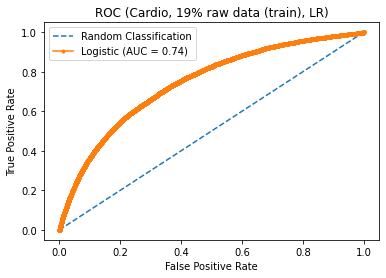

In [8]:
# roc curve and auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = classifier.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 19% raw data (train), LR)')
# show the legend
pyplot.legend()
pyplot.show()

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.726


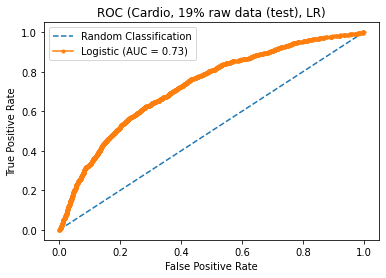

In [9]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = classifier.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 19% raw data (test), LR)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# SVM with raw dataset

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC

clf = make_pipeline(StandardScaler(), SVC(probability=True))
clf.fit(X_train, y_train)
print(classification_report(y_train, clf.predict(X_train)))

              precision    recall  f1-score   support

           0       0.82      0.98      0.89     27743
           1       0.62      0.10      0.18      6680

    accuracy                           0.81     34423
   macro avg       0.72      0.54      0.54     34423
weighted avg       0.78      0.81      0.76     34423



In [11]:
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.82      0.98      0.89      6936
           1       0.53      0.09      0.15      1670

    accuracy                           0.81      8606
   macro avg       0.67      0.53      0.52      8606
weighted avg       0.76      0.81      0.75      8606



No Skill: ROC AUC=0.500
SVM: ROC AUC=0.779


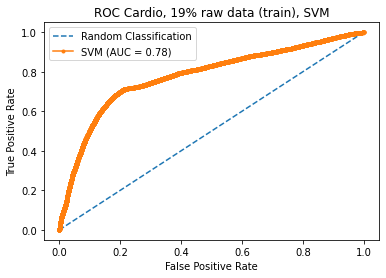

In [12]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = clf.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('SVM: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='SVM (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC Cardio, 19% raw data (train), SVM')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.736


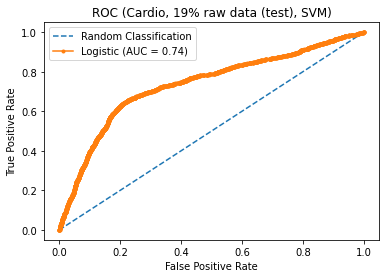

In [13]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 19% raw data (test), SVM)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# XGBoost with raw dataset

In [14]:
import xgboost as xgb
import pickle
from matplotlib import pyplot
import matplotlib.pyplot as plt

In [15]:
%%time

model = xgb.XGBClassifier(max_depth=4,
                        subsample=0.9,
                        objective='binary:logistic',
                        n_estimators=200,
                        learning_rate = 0.1)
eval_set = [(X_train, y_train), (X_test, y_test)]
model.fit(X_train, y_train.values.ravel(), early_stopping_rounds=10, eval_metric=["error", "logloss"], eval_set=eval_set, verbose=True)

[0]	validation_0-error:0.17346	validation_0-logloss:0.64522	validation_1-error:0.17976	validation_1-logloss:0.64590
[1]	validation_0-error:0.17328	validation_0-logloss:0.60589	validation_1-error:0.17906	validation_1-logloss:0.60714
[2]	validation_0-error:0.17250	validation_0-logloss:0.57358	validation_1-error:0.17836	validation_1-logloss:0.57522
[3]	validation_0-error:0.17119	validation_0-logloss:0.54652	validation_1-error:0.17720	validation_1-logloss:0.54880
[4]	validation_0-error:0.17250	validation_0-logloss:0.52384	validation_1-error:0.17790	validation_1-logloss:0.52660
[5]	validation_0-error:0.17096	validation_0-logloss:0.50453	validation_1-error:0.17778	validation_1-logloss:0.50792
[6]	validation_0-error:0.17041	validation_0-logloss:0.48822	validation_1-error:0.17732	validation_1-logloss:0.49215
[7]	validation_0-error:0.17056	validation_0-logloss:0.47421	validation_1-error:0.17790	validation_1-logloss:0.47846
[8]	validation_0-error:0.17079	validation_0-logloss:0.46226	validation_1

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [16]:
print(classification_report(y_train, model.predict(X_train)))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90     27743
           1       0.60      0.42      0.50      6680

    accuracy                           0.83     34423
   macro avg       0.74      0.68      0.70     34423
weighted avg       0.82      0.83      0.82     34423



In [17]:
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89      6936
           1       0.56      0.40      0.47      1670

    accuracy                           0.82      8606
   macro avg       0.71      0.66      0.68      8606
weighted avg       0.81      0.82      0.81      8606



No Skill: ROC AUC=0.500
XGBoost: ROC AUC=0.818


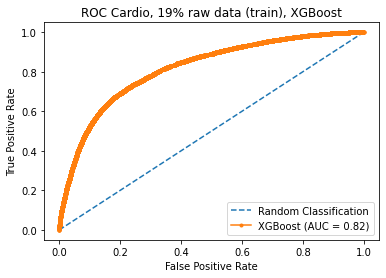

In [18]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('XGBoost: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='XGBoost (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC Cardio, 19% raw data (train), XGBoost')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
XGBoost: ROC AUC=0.791


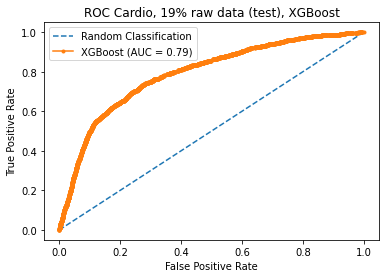

In [19]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('XGBoost: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='XGBoost (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC Cardio, 19% raw data (test), XGBoost')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# Data augmentation

In the following part, the data gets perfectly balanced, by applying SMOTE, TVAE, and CTGAN to the raw dataset. The minority class is oversampled, by only creating samples with cardio=1. Afterwards, the machine learning algorithms run with the balaned datasets.

In [20]:
df_train = X_train
df_train['cardio'] = y_train

In [21]:
df_train.head()

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
29430  61151  19034       1     151    71.0    140     90            1     1   
26146  51705  21383       1     170    78.0    120     80            1     1   
22136  40160  19763       1     161    73.0     80     60            2     1   
11898  11189  14606       1     162    59.0    120     80            1     1   
28202  57654  15810       2     170    74.0    130    100            1     1   

       smoke  alco  active  cardio  
29430      0     0       0       0  
26146      0     0       1       0  
22136      0     0       0       0  
11898      0     0       1       0  
28202      0     0       1       0


### SMOTE

1    27743
0    27743
Name: cardio, dtype: int64

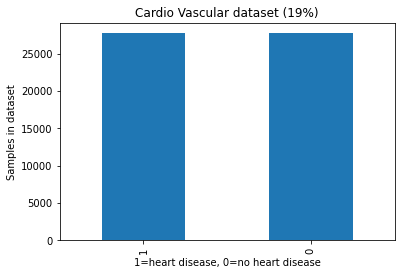

In [22]:
#Importing SMOTE
from imblearn.over_sampling import SMOTE
#Oversampling the data
smote = SMOTE(random_state = 101)
X, y = smote.fit_resample(df_train[['id','age','gender','height','weight','ap_hi','ap_lo','cholesterol','gluc','smoke','alco','active']], df_train['cardio'])
#Creating a new Oversampling Data Frame
df_oversampler = pd.DataFrame(X, columns = ['id','age','gender','height','weight','ap_hi','ap_lo','cholesterol','gluc','smoke','alco','active'])
df_oversampler_y = pd.DataFrame(y, columns = ['cardio'])
pd.value_counts(df_oversampler_y['cardio']).plot.bar()
plt.title('Cardio Vascular dataset (19%)')
plt.xlabel('1=heart disease, 0=no heart disease')
plt.ylabel('Samples in dataset')
df_oversampler_y['cardio'].value_counts()

In [23]:
X_train = df_oversampler
y_train = df_oversampler_y

## Logistic Regression with data from SMOTE

In [24]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
print(classification_report(y_train, classifier.predict(X_train)))

              precision    recall  f1-score   support

           0       0.70      0.73      0.72     27743
           1       0.72      0.69      0.71     27743

    accuracy                           0.71     55486
   macro avg       0.71      0.71      0.71     55486
weighted avg       0.71      0.71      0.71     55486



In [25]:
print(classification_report(y_test, classifier.predict(X_test)))

              precision    recall  f1-score   support

           0       0.90      0.72      0.80      6936
           1       0.36      0.65      0.46      1670

    accuracy                           0.71      8606
   macro avg       0.63      0.69      0.63      8606
weighted avg       0.79      0.71      0.73      8606



No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.776


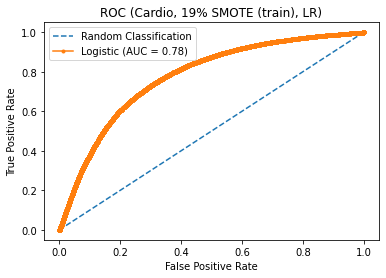

In [26]:
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = classifier.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 19% SMOTE (train), LR)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.742


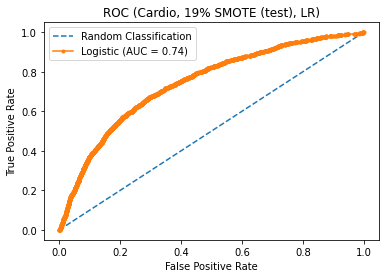

In [27]:
# roc curve and auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = classifier.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 19% SMOTE (test), LR)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

## SVM with data from SMOTE

In [28]:
clf = make_pipeline(StandardScaler(), SVC(probability=True))
clf.fit(X_train, y_train)
print(classification_report(y_train, clf.predict(X_train)))

              precision    recall  f1-score   support

           0       0.76      0.78      0.77     27743
           1       0.77      0.75      0.76     27743

    accuracy                           0.77     55486
   macro avg       0.77      0.77      0.77     55486
weighted avg       0.77      0.77      0.77     55486



In [29]:
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.88      0.77      0.82      6936
           1       0.37      0.56      0.44      1670

    accuracy                           0.73      8606
   macro avg       0.62      0.66      0.63      8606
weighted avg       0.78      0.73      0.75      8606



No Skill: ROC AUC=0.500
SVM: ROC AUC=0.839


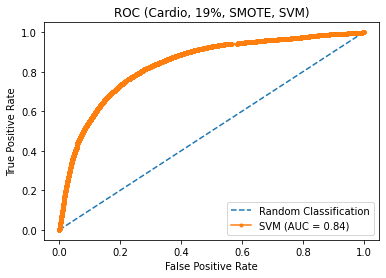

In [30]:
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = clf.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('SVM: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='SVM (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 19%, SMOTE, SVM)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
SVM: ROC AUC=0.740


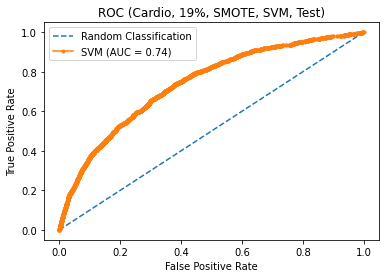

In [31]:
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('SVM: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='SVM (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 19%, SMOTE, SVM, Test)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

## XGBoost with data from SMOTE

In [32]:
%%time

model = xgb.XGBClassifier(max_depth=4,
                        subsample=0.9,
                        objective='binary:logistic',
                        n_estimators=200,
                        learning_rate = 0.1)
eval_set = [(X_train, y_train), (X_test, y_test)]
model.fit(X_train, y_train.values.ravel(), early_stopping_rounds=10, eval_metric=["error", "logloss"], eval_set=eval_set, verbose=True)

[0]	validation_0-error:0.21052	validation_0-logloss:0.65595	validation_1-error:0.23588	validation_1-logloss:0.66197
[1]	validation_0-error:0.20895	validation_0-logloss:0.62350	validation_1-error:0.23135	validation_1-logloss:0.63498
[2]	validation_0-error:0.20256	validation_0-logloss:0.59695	validation_1-error:0.21532	validation_1-logloss:0.61282
[3]	validation_0-error:0.20888	validation_0-logloss:0.57569	validation_1-error:0.22624	validation_1-logloss:0.59515
[4]	validation_0-error:0.20248	validation_0-logloss:0.55624	validation_1-error:0.21020	validation_1-logloss:0.57903
[5]	validation_0-error:0.20072	validation_0-logloss:0.53703	validation_1-error:0.20683	validation_1-logloss:0.56408
[6]	validation_0-error:0.19859	validation_0-logloss:0.52211	validation_1-error:0.20706	validation_1-logloss:0.55276
[7]	validation_0-error:0.20333	validation_0-logloss:0.51114	validation_1-error:0.22194	validation_1-logloss:0.54378
[8]	validation_0-error:0.20302	validation_0-logloss:0.50191	validation_1

[71]	validation_0-error:0.15701	validation_0-logloss:0.36006	validation_1-error:0.20369	validation_1-logloss:0.45563
[72]	validation_0-error:0.15685	validation_0-logloss:0.35968	validation_1-error:0.20369	validation_1-logloss:0.45558
[73]	validation_0-error:0.15671	validation_0-logloss:0.35939	validation_1-error:0.20346	validation_1-logloss:0.45570
[74]	validation_0-error:0.15611	validation_0-logloss:0.35877	validation_1-error:0.20323	validation_1-logloss:0.45541
[75]	validation_0-error:0.15575	validation_0-logloss:0.35811	validation_1-error:0.20369	validation_1-logloss:0.45524
[76]	validation_0-error:0.15528	validation_0-logloss:0.35729	validation_1-error:0.20335	validation_1-logloss:0.45495
[77]	validation_0-error:0.15526	validation_0-logloss:0.35658	validation_1-error:0.20335	validation_1-logloss:0.45466
[78]	validation_0-error:0.15514	validation_0-logloss:0.35624	validation_1-error:0.20358	validation_1-logloss:0.45460
[79]	validation_0-error:0.15505	validation_0-logloss:0.35577	val

[141]	validation_0-error:0.14297	validation_0-logloss:0.33015	validation_1-error:0.20091	validation_1-logloss:0.44711
[142]	validation_0-error:0.14261	validation_0-logloss:0.32983	validation_1-error:0.20079	validation_1-logloss:0.44696
[143]	validation_0-error:0.14263	validation_0-logloss:0.32972	validation_1-error:0.20056	validation_1-logloss:0.44699
[144]	validation_0-error:0.14254	validation_0-logloss:0.32961	validation_1-error:0.20067	validation_1-logloss:0.44697
[145]	validation_0-error:0.14227	validation_0-logloss:0.32921	validation_1-error:0.20044	validation_1-logloss:0.44676
[146]	validation_0-error:0.14209	validation_0-logloss:0.32896	validation_1-error:0.20033	validation_1-logloss:0.44667
[147]	validation_0-error:0.14150	validation_0-logloss:0.32802	validation_1-error:0.20033	validation_1-logloss:0.44631
[148]	validation_0-error:0.14122	validation_0-logloss:0.32758	validation_1-error:0.20044	validation_1-logloss:0.44622
[149]	validation_0-error:0.14059	validation_0-logloss:0.

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [33]:
print(classification_report(y_train, model.predict(X_train)))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87     27743
           1       0.89      0.84      0.86     27743

    accuracy                           0.87     55486
   macro avg       0.87      0.87      0.87     55486
weighted avg       0.87      0.87      0.87     55486



In [34]:
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.87      0.88      0.88      6936
           1       0.49      0.46      0.47      1670

    accuracy                           0.80      8606
   macro avg       0.68      0.67      0.68      8606
weighted avg       0.80      0.80      0.80      8606



No Skill: ROC AUC=0.500
XGBoost: ROC AUC=0.941


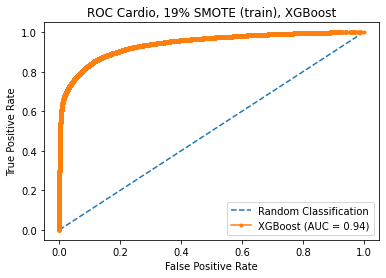

In [35]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('XGBoost: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='XGBoost (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC Cardio, 19% SMOTE (train), XGBoost')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
XGBoost: ROC AUC=0.775


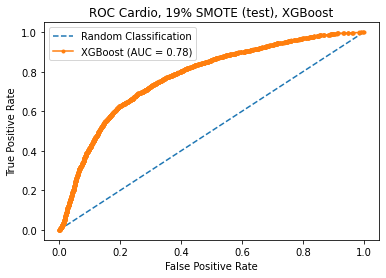

In [36]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('XGBoost: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='XGBoost (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC Cardio, 19% SMOTE (test), XGBoost')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

## Data augmentation with TVAE 

In [37]:
df_train['cardio'].value_counts()

0    27743
1     6680
Name: cardio, dtype: int64

In [38]:
from sdv.tabular import TVAE
tvae = TVAE()

tvae.fit(df_train)
# Once trained generate samples
samples = tvae.sample(2000)
samples = samples[samples['cardio'] ==1.0]
tvae_result_df = pd.concat([df_train,samples])
tvae_result_df['cardio'].value_counts()

0    27743
1     6712
Name: cardio, dtype: int64

In [39]:
tvae = TVAE()

tvae.fit(tvae_result_df)
# Once trained generate samples
samples = tvae.sample(10000)
samples = samples[samples['cardio'] ==1.0]
tvae_result_df1 = pd.concat([tvae_result_df,samples])
tvae_result_df1['cardio'].value_counts()

0    27743
1    10125
Name: cardio, dtype: int64

In [40]:
tvae = TVAE()

tvae.fit(tvae_result_df1)
# Once trained generate samples
samples = tvae.sample(10000)
samples = samples[samples['cardio'] ==1.0]
tvae_result_df2 = pd.concat([tvae_result_df1,samples])
tvae_result_df2['cardio'].value_counts()

0    27743
1    13709
Name: cardio, dtype: int64

In [41]:
tvae = TVAE()

tvae.fit(tvae_result_df2)
# Once trained generate samples
samples = tvae.sample(13000)
samples = samples[samples['cardio'] ==1.0]
tvae_result_df3 = pd.concat([tvae_result_df2,samples])
tvae_result_df3['cardio'].value_counts()

0    27743
1    18998
Name: cardio, dtype: int64

In [42]:
tvae = TVAE()

tvae.fit(tvae_result_df3)
# Once trained generate samples
samples = tvae.sample(15000)
samples = samples[samples['cardio'] ==1.0]
tvae_result_df4 = pd.concat([tvae_result_df3,samples])
tvae_result_df4['cardio'].value_counts()

0    27743
1    19540
Name: cardio, dtype: int64

In [43]:
tvae = TVAE()

tvae.fit(tvae_result_df4)
# Once trained generate samples
samples = tvae.sample(17000)
samples = samples[samples['cardio'] ==1.0]
tvae_result_df5 = pd.concat([tvae_result_df4,samples])
tvae_result_df5['cardio'].value_counts()

0    27743
1    25953
Name: cardio, dtype: int64

In [44]:
tvae = TVAE()

tvae.fit(tvae_result_df5)
# Once trained generate samples
samples = tvae.sample(20000)
samples = samples[samples['cardio'] ==1.0]
tvae_result_df6 = pd.concat([tvae_result_df5,samples])
tvae_result_df6['cardio'].value_counts()

1    28102
0    27743
Name: cardio, dtype: int64

In [45]:
tvae = TVAE()

tvae.fit(tvae_result_df6)
# Once trained generate samples
samples = tvae.sample(22000)
samples = samples[samples['cardio'] ==1.0]
tvae_result_df7 = pd.concat([tvae_result_df6,samples])
tvae_result_df7['cardio'].value_counts()

1    36767
0    27743
Name: cardio, dtype: int64

In [46]:
tvae_result_df_1 = tvae_result_df7[tvae_result_df7['cardio'] == 1]
tvae_result_df_1['cardio'].value_counts()

1    36767
Name: cardio, dtype: int64

In [47]:
tvae_result_df_0 = tvae_result_df7[tvae_result_df7['cardio'] == 0]
tvae_result_df_0['cardio'].value_counts()

0    27743
Name: cardio, dtype: int64

In [48]:
train_df_1_bal = tvae_result_df_1.sample(n = 27743)

In [49]:
train_df_balanced = train_df_1_bal.append(tvae_result_df_0)

1    27743
0    27743
Name: cardio, dtype: int64

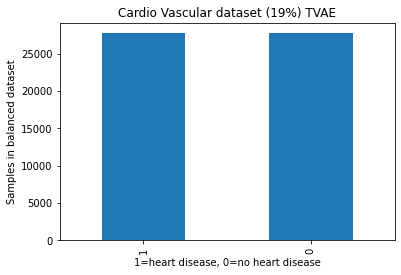

In [50]:
pd.value_counts(train_df_balanced['cardio']).plot.bar()
plt.title('Cardio Vascular dataset (19%) TVAE')
plt.xlabel('1=heart disease, 0=no heart disease')
plt.ylabel('Samples in balanced dataset')
train_df_balanced['cardio'].value_counts()

In [51]:
X_train = train_df_balanced.drop(['cardio'], axis=1)
y_train = train_df_balanced['cardio']

### Logistic Regression with TVAE balanced data

In [52]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
print(classification_report(y_train, classifier.predict(X_train)))

              precision    recall  f1-score   support

           0       0.67      0.74      0.70     27743
           1       0.71      0.64      0.67     27743

    accuracy                           0.69     55486
   macro avg       0.69      0.69      0.69     55486
weighted avg       0.69      0.69      0.69     55486



In [53]:
print(classification_report(y_test, classifier.predict(X_test)))

              precision    recall  f1-score   support

           0       0.85      0.73      0.79      6936
           1       0.29      0.45      0.35      1670

    accuracy                           0.68      8606
   macro avg       0.57      0.59      0.57      8606
weighted avg       0.74      0.68      0.70      8606



No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.704


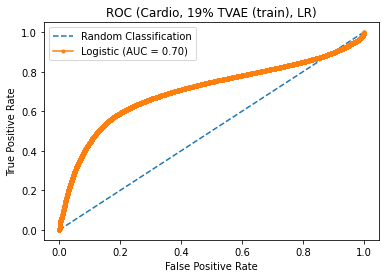

In [54]:
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = classifier.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 19% TVAE (train), LR)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.641


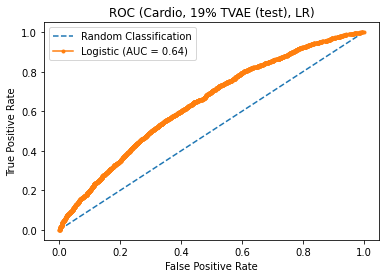

In [55]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = classifier.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 19% TVAE (test), LR)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

## SVM with TVAE balanced data

In [56]:
clf = make_pipeline(StandardScaler(), SVC(probability=True))
clf.fit(X_train, y_train)
print(classification_report(y_train, clf.predict(X_train)))

              precision    recall  f1-score   support

           0       0.82      0.96      0.88     27743
           1       0.95      0.79      0.86     27743

    accuracy                           0.87     55486
   macro avg       0.89      0.87      0.87     55486
weighted avg       0.89      0.87      0.87     55486



In [57]:
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.82      0.95      0.88      6936
           1       0.41      0.14      0.21      1670

    accuracy                           0.79      8606
   macro avg       0.62      0.55      0.55      8606
weighted avg       0.74      0.79      0.75      8606



No Skill: ROC AUC=0.500
SVM: ROC AUC=0.941


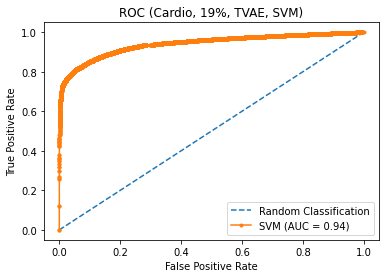

In [58]:
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = clf.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('SVM: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='SVM (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 19%, TVAE, SVM)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
SVM: ROC AUC=0.708


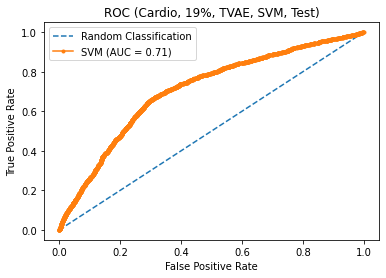

In [59]:
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('SVM: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='SVM (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 19%, TVAE, SVM, Test)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# XGBoost with TVAE balanced data

In [60]:
%%time

model = xgb.XGBClassifier(max_depth=4,
                        subsample=0.9,
                        objective='binary:logistic',
                        n_estimators=200,
                        learning_rate = 0.1)
eval_set = [(X_train, y_train), (X_test, y_test)]
model.fit(X_train, y_train.values.ravel(), early_stopping_rounds=10, eval_metric=["error", "logloss"], eval_set=eval_set, verbose=True)

[0]	validation_0-error:0.16336	validation_0-logloss:0.64233	validation_1-error:0.20381	validation_1-logloss:0.65684
[1]	validation_0-error:0.16336	validation_0-logloss:0.60092	validation_1-error:0.20381	validation_1-logloss:0.62711
[2]	validation_0-error:0.16336	validation_0-logloss:0.56550	validation_1-error:0.20381	validation_1-logloss:0.60158
[3]	validation_0-error:0.16004	validation_0-logloss:0.53481	validation_1-error:0.20393	validation_1-logloss:0.57970
[4]	validation_0-error:0.15937	validation_0-logloss:0.50923	validation_1-error:0.20404	validation_1-logloss:0.56168
[5]	validation_0-error:0.16363	validation_0-logloss:0.48678	validation_1-error:0.20753	validation_1-logloss:0.54759
[6]	validation_0-error:0.15051	validation_0-logloss:0.46634	validation_1-error:0.20311	validation_1-logloss:0.53310
[7]	validation_0-error:0.16121	validation_0-logloss:0.44940	validation_1-error:0.20869	validation_1-logloss:0.52267
[8]	validation_0-error:0.15193	validation_0-logloss:0.43190	validation_1

[71]	validation_0-error:0.10129	validation_0-logloss:0.23958	validation_1-error:0.19033	validation_1-logloss:0.41597
[72]	validation_0-error:0.10093	validation_0-logloss:0.23899	validation_1-error:0.19080	validation_1-logloss:0.41591
[73]	validation_0-error:0.10096	validation_0-logloss:0.23861	validation_1-error:0.19115	validation_1-logloss:0.41590
[74]	validation_0-error:0.10064	validation_0-logloss:0.23827	validation_1-error:0.19045	validation_1-logloss:0.41583
[75]	validation_0-error:0.10030	validation_0-logloss:0.23801	validation_1-error:0.19057	validation_1-logloss:0.41585
[76]	validation_0-error:0.09974	validation_0-logloss:0.23699	validation_1-error:0.19057	validation_1-logloss:0.41546
[77]	validation_0-error:0.09992	validation_0-logloss:0.23687	validation_1-error:0.19022	validation_1-logloss:0.41549
[78]	validation_0-error:0.09961	validation_0-logloss:0.23630	validation_1-error:0.19010	validation_1-logloss:0.41538
[79]	validation_0-error:0.09954	validation_0-logloss:0.23620	val

[141]	validation_0-error:0.09390	validation_0-logloss:0.22131	validation_1-error:0.18871	validation_1-logloss:0.41342
[142]	validation_0-error:0.09357	validation_0-logloss:0.22113	validation_1-error:0.18940	validation_1-logloss:0.41331
[143]	validation_0-error:0.09337	validation_0-logloss:0.22096	validation_1-error:0.18940	validation_1-logloss:0.41328
[144]	validation_0-error:0.09337	validation_0-logloss:0.22087	validation_1-error:0.18940	validation_1-logloss:0.41332
[145]	validation_0-error:0.09310	validation_0-logloss:0.22074	validation_1-error:0.18882	validation_1-logloss:0.41327
[146]	validation_0-error:0.09291	validation_0-logloss:0.22052	validation_1-error:0.18859	validation_1-logloss:0.41334
[147]	validation_0-error:0.09287	validation_0-logloss:0.22035	validation_1-error:0.18859	validation_1-logloss:0.41329
[148]	validation_0-error:0.09271	validation_0-logloss:0.22026	validation_1-error:0.18847	validation_1-logloss:0.41328
[149]	validation_0-error:0.09258	validation_0-logloss:0.

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [61]:
print(classification_report(y_train, model.predict(X_train)))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91     27743
           1       0.95      0.86      0.90     27743

    accuracy                           0.91     55486
   macro avg       0.91      0.91      0.91     55486
weighted avg       0.91      0.91      0.91     55486



In [62]:
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      6936
           1       0.53      0.26      0.35      1670

    accuracy                           0.81      8606
   macro avg       0.68      0.60      0.62      8606
weighted avg       0.78      0.81      0.78      8606



No Skill: ROC AUC=0.500
XGBoost: ROC AUC=0.963


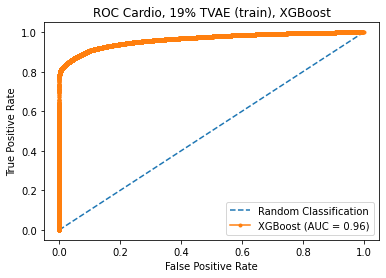

In [63]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('XGBoost: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='XGBoost (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC Cardio, 19% TVAE (train), XGBoost')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
XGBoost: ROC AUC=0.782


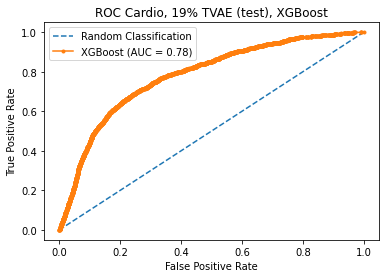

In [64]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('XGBoost: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='XGBoost (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC Cardio, 19% TVAE (test), XGBoost')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

## CTGAN for balancing the dataset

In [65]:
train_df_small = df_train.sample(n = 2000)

0    1627
1     373
Name: cardio, dtype: int64

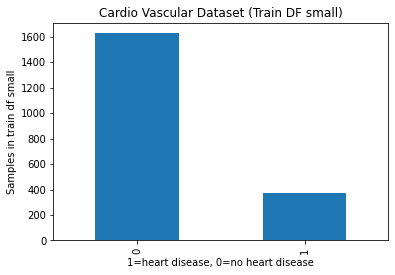

In [66]:
pd.value_counts(train_df_small['cardio']).plot.bar()
plt.title('Cardio Vascular Dataset (Train DF small)')
plt.xlabel('1=heart disease, 0=no heart disease')
plt.ylabel('Samples in train df small')
train_df_small['cardio'].value_counts()

In [67]:
from ctgan import CTGANSynthesizer
ctgan = CTGANSynthesizer()

ctgan.fit(train_df_small, discrete_columns=('gender','cholesterol','gluc','smoke','alco','active','cardio'))
# Once trained generate samples
samples = ctgan.sample(500)
samples = samples[samples['cardio'] ==1.0]
samples['cardio'].value_counts()

1    81
Name: cardio, dtype: int64

In [68]:
df_train['cardio'].value_counts()

0    27743
1     6680
Name: cardio, dtype: int64

In [69]:
ctgan_1 = df_train[df_train['cardio'] == 1]
ctgan_0 = df_train[df_train['cardio'] == 0]
ctgan_0_sm = ctgan_0.sample(n = 9000)
df_train_sm = samples.append(ctgan_0_sm)
df_train_sm = df_train_sm.append(ctgan_1)
df_train_sm['cardio'].value_counts()

0    9000
1    6761
Name: cardio, dtype: int64

In [70]:
ctgan = CTGANSynthesizer()

ctgan.fit(df_train_sm, discrete_columns=('gender','cholesterol','gluc','smoke','alco','active','cardio'))
# Once trained generate samples
samples1 = ctgan.sample(7000)
samples1 = samples1[samples1['cardio'] ==1.0]
samples1['cardio'].value_counts()

1    3469
Name: cardio, dtype: int64

In [71]:
df_train_sm1 = df_train_sm.append(samples1)
ctgan = CTGANSynthesizer()

ctgan.fit(df_train_sm1, discrete_columns=('gender','cholesterol','gluc','smoke','alco','active','cardio'))
# Once trained generate samples
samples2 = ctgan.sample(10000)
samples2 = samples2[samples2['cardio'] ==1.0]
samples2['cardio'].value_counts()

1    4592
Name: cardio, dtype: int64

In [72]:
df_train_med1 = df_train_sm1.append(samples2) 
ctgan_0_med = ctgan_0.sample(n = 16000)
df_train_med = ctgan_0_med.append(df_train_med1)
df_train_med['cardio'].value_counts()

0    25000
1    14822
Name: cardio, dtype: int64

In [73]:
ctgan = CTGANSynthesizer()

ctgan.fit(df_train_med, discrete_columns=('gender','cholesterol','gluc','smoke','alco','active','cardio'))
# Once trained generate samples
samples3 = ctgan.sample(20000)
samples3 = samples3[samples3['cardio'] ==1.0]
samples3['cardio'].value_counts()

1    9638
Name: cardio, dtype: int64

In [74]:
df_train_med_1 = df_train_med.append(samples3) 

ctgan = CTGANSynthesizer()

ctgan.fit(df_train_med_1, discrete_columns=('gender','cholesterol','gluc','smoke','alco','active','cardio'))
# Once trained generate samples
samples4 = ctgan.sample(20000)
samples4 = samples4[samples4['cardio'] ==1.0]
samples4['cardio'].value_counts()

1    10303
Name: cardio, dtype: int64

In [75]:
df_train_med_2 = df_train_med_1.append(samples4) 
df_train_med_2['cardio'].value_counts()

1    34763
0    25000
Name: cardio, dtype: int64

In [76]:
ctgan_1 = df_train_med_2[df_train_med_2['cardio'] == 1]
ctgan_0 = df_train[df_train['cardio'] == 0]

In [77]:
train_df_1_bal = ctgan_1.sample(n = 27743)

In [78]:
df_train_bal = train_df_1_bal.append(ctgan_0)

In [79]:
df_train_bal['cardio'].value_counts()

1    27743
0    27743
Name: cardio, dtype: int64

In [80]:
X_train = df_train_bal.drop(['cardio'], axis=1)
y_train = df_train_bal['cardio']

### Logistic Regression with CTGAN data

In [81]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
print(classification_report(y_train, classifier.predict(X_train)))

              precision    recall  f1-score   support

           0       0.73      0.81      0.77     27743
           1       0.78      0.70      0.74     27743

    accuracy                           0.75     55486
   macro avg       0.76      0.75      0.75     55486
weighted avg       0.76      0.75      0.75     55486



In [82]:
print(classification_report(y_test, classifier.predict(X_test)))

              precision    recall  f1-score   support

           0       0.89      0.80      0.84      6936
           1       0.42      0.59      0.49      1670

    accuracy                           0.76      8606
   macro avg       0.65      0.70      0.67      8606
weighted avg       0.80      0.76      0.77      8606



No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.815


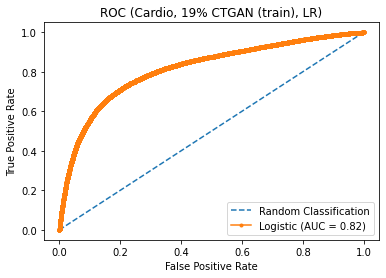

In [83]:
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = classifier.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 19% CTGAN (train), LR)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.742


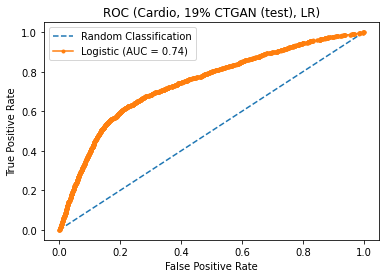

In [84]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = classifier.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 19% CTGAN (test), LR)')
# show the legend
pyplot.legend()
# show the plot

### SVM with CTGAN data

In [85]:
clf = make_pipeline(StandardScaler(), SVC(probability=True))
clf.fit(X_train, y_train)
print(classification_report(y_train, clf.predict(X_train)))

              precision    recall  f1-score   support

           0       0.77      0.84      0.81     27743
           1       0.83      0.76      0.79     27743

    accuracy                           0.80     55486
   macro avg       0.80      0.80      0.80     55486
weighted avg       0.80      0.80      0.80     55486



In [86]:
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.89      0.83      0.86      6936
           1       0.45      0.58      0.51      1670

    accuracy                           0.78      8606
   macro avg       0.67      0.71      0.69      8606
weighted avg       0.81      0.78      0.79      8606



No Skill: ROC AUC=0.500
SVM: ROC AUC=0.863


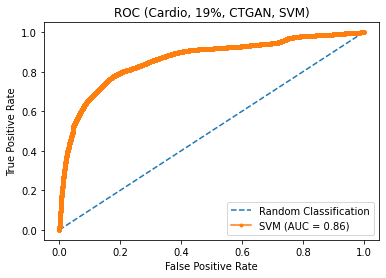

In [87]:
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = clf.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('SVM: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='SVM (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 19%, CTGAN, SVM)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
SVM: ROC AUC=0.761


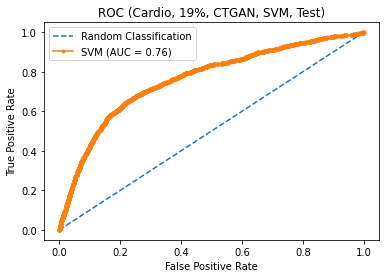

In [88]:
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('SVM: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='SVM (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 19%, CTGAN, SVM, Test)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

### XGBoost with CTGAN data

In [89]:
%%time

model = xgb.XGBClassifier(max_depth=4,
                        subsample=0.9,
                        objective='binary:logistic',
                        n_estimators=200,
                        learning_rate = 0.1)
eval_set = [(X_train, y_train), (X_test, y_test)]
model.fit(X_train, y_train.values.ravel(), early_stopping_rounds=10, eval_metric=["error", "logloss"], eval_set=eval_set, verbose=True)

[0]	validation_0-error:0.14052	validation_0-logloss:0.63932	validation_1-error:0.19707	validation_1-logloss:0.65212
[1]	validation_0-error:0.14052	validation_0-logloss:0.59952	validation_1-error:0.19707	validation_1-logloss:0.62134
[2]	validation_0-error:0.15424	validation_0-logloss:0.56557	validation_1-error:0.19161	validation_1-logloss:0.59584
[3]	validation_0-error:0.15424	validation_0-logloss:0.53859	validation_1-error:0.19161	validation_1-logloss:0.57473
[4]	validation_0-error:0.15343	validation_0-logloss:0.51035	validation_1-error:0.19184	validation_1-logloss:0.55524
[5]	validation_0-error:0.14007	validation_0-logloss:0.48818	validation_1-error:0.19730	validation_1-logloss:0.53916
[6]	validation_0-error:0.14238	validation_0-logloss:0.47159	validation_1-error:0.19521	validation_1-logloss:0.52702
[7]	validation_0-error:0.14052	validation_0-logloss:0.45524	validation_1-error:0.19707	validation_1-logloss:0.51576
[8]	validation_0-error:0.14052	validation_0-logloss:0.44040	validation_1

[71]	validation_0-error:0.11347	validation_0-logloss:0.27764	validation_1-error:0.19789	validation_1-logloss:0.43719
[72]	validation_0-error:0.11338	validation_0-logloss:0.27723	validation_1-error:0.19835	validation_1-logloss:0.43718
[73]	validation_0-error:0.11306	validation_0-logloss:0.27697	validation_1-error:0.19765	validation_1-logloss:0.43726
[74]	validation_0-error:0.11284	validation_0-logloss:0.27644	validation_1-error:0.19730	validation_1-logloss:0.43732
[75]	validation_0-error:0.11284	validation_0-logloss:0.27583	validation_1-error:0.19765	validation_1-logloss:0.43723
[76]	validation_0-error:0.11259	validation_0-logloss:0.27536	validation_1-error:0.19742	validation_1-logloss:0.43708
[77]	validation_0-error:0.11252	validation_0-logloss:0.27515	validation_1-error:0.19707	validation_1-logloss:0.43707
[78]	validation_0-error:0.11246	validation_0-logloss:0.27490	validation_1-error:0.19719	validation_1-logloss:0.43704
CPU times: user 6.61 s, sys: 93.3 ms, total: 6.7 s
Wall time: 7.

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [90]:
print(classification_report(y_train, model.predict(X_train)))

              precision    recall  f1-score   support

           0       0.87      0.90      0.89     27743
           1       0.90      0.87      0.88     27743

    accuracy                           0.89     55486
   macro avg       0.89      0.89      0.89     55486
weighted avg       0.89      0.89      0.89     55486



In [91]:
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      6936
           1       0.49      0.40      0.44      1670

    accuracy                           0.80      8606
   macro avg       0.67      0.65      0.66      8606
weighted avg       0.79      0.80      0.79      8606



No Skill: ROC AUC=0.500
XGBoost: ROC AUC=0.951


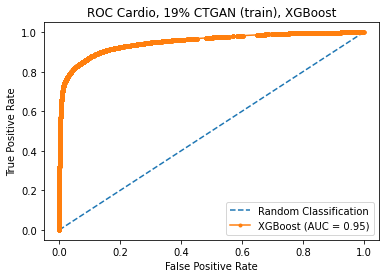

In [92]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('XGBoost: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='XGBoost (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC Cardio, 19% CTGAN (train), XGBoost')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
XGBoost: ROC AUC=0.770


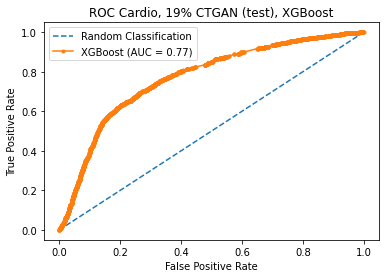

In [93]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('XGBoost: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='XGBoost (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC Cardio, 19% CTGAN (test), XGBoost')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()